### Lab 3-2:  Wind profiles
We typically have a measurement of wind at one height above the ground but need to estimate (a) the wind at the height of the smokestack plume or (b) the average wind speed within the mixing depth (to determine the dilution rate or ventilation coefficient).

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

From lecture notes, we define
$$ u(z) = u_{ref}(\frac{z}{z_{ref}})^p $$
where $u(z)$ is the wind at any elevation, $u_{ref}$ is the reference wind (this is what is measured), $z$ is the elevation, $z_{ref}$ is the elevation at which the reference wind was measured, and $p$ is an exponent, which varies with stability and roughness. 

When using a reference height of 10 m, the EPA recommends using values of of p from the following table (from the User’s Guide for the ISC3 Dispersion Models, Vol II, EPA_454/B-95-003b, U.S. EPA, Sept. 1995):

| Stability Category | Urban | Rural |
| --- | --- | --- |
| A | 0.15 | 0.07 |
| B | 0.15 | 0.07 |
| C | 0.20 | 0.10 |
| D | 0.25 | 0.15 |
| E | 0.30 | 0.35 |
| F | 0.30 | 0.55 |


In [3]:
# Now we can read in our sounding data from lab 2 and see how the wind profile observed by the balloon matches this
# copy one stable day '2022-01-10_radiosonde.csv' and one stormy and well-mixed day '2021-12-26_radiosone.csv' 
# into this folder where you're working.

sonde_temp_profile = pd.read_csv('2022-01-10_radiosonde.csv')
# take a look at what is included in the file
sonde_temp_profile.head()
# Here, we are interested in the wind speed (wspd) in m/s.
# Note that the sounding also provides info on wind direction, where
# u_wind is the magnitude of winds moving from west to east, and 
# v_wind is the magnitude of winds moving from south to north.

time       pres  qc_pres      tdry  qc_tdry         dp  \
0  2022-01-10 11:34:00  713.79047      0.0 -9.979830      0.0 -18.522203   
1  2022-01-10 11:35:00  687.39090      0.0 -5.463167      0.0 -21.827170   
2  2022-01-10 11:36:00  662.85834      0.0 -4.424000      0.0 -26.478666   
3  2022-01-10 11:37:00  640.70935      0.0 -4.980833      0.0 -30.277832   
4  2022-01-10 11:38:00  623.39840      0.0 -5.733000      0.0 -32.042500   

   qc_dp      wspd  qc_wspd        deg  ...  qc_u_wind    v_wind  qc_v_wind  \
0    0.0  1.867797      0.0  328.13560  ...        0.0 -1.741468        0.0   
1    0.0  0.898333      0.0  154.98334  ...        0.0 -0.746618        0.0   
2    0.0  1.211667      0.0  252.70000  ...        0.0 -0.953473        0.0   
3    0.0  2.588334      0.0  335.06668  ...        0.0 -2.305604        0.0   
4    0.0  3.016666      0.0  302.40000  ...        0.0 -2.379487        0.0   

   wstat       asc    qc_asc        lat        lon        alt  potential_T  
0    NaN  5.147457  0.135593  38.959520 -106.98986  3055.1375    16.678686  
1    NaN  4.701667  0.000000  38.958880 -106.98948  3348.7185    24.837664  
2    NaN  4.918333  0.000000  38.958366 -106.98947  3634.4617    29.118020  
3    NaN  3.791666  0.000000  38.957546 -106.98897  3901.4053    31.435535  
4    NaN  3.650000  0.000000  38.956264 -106.98776  4116.1970    32.968940  

[5 rows x 24 columns]

Text(0.5, 1.0, 'Wind speed with height')

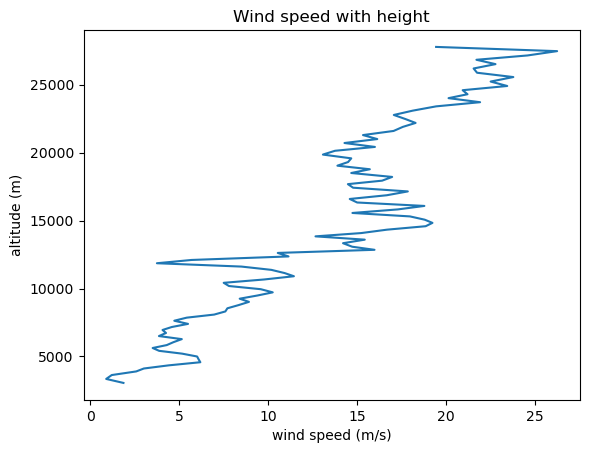

In [4]:
# Make a plot of height vs. windspeed
plt.figure()
plt.plot(sonde_temp_profile['wspd'],sonde_temp_profile['alt'])
plt.ylabel('altitude (m)')
plt.xlabel('wind speed (m/s)')
#plt.xlim(0,10000) 
plt.title('Wind speed with height')

In [5]:
# Add in the other day for comparison
sonde_temp_profile2 = pd.read_csv('2021-12-26_radiosonde.csv')
sonde_temp_profile2.head()

time       pres  qc_pres       tdry  qc_tdry         dp  \
0  2021-12-26 11:21:00  693.21545      0.0  -4.425254      0.0  -8.821864   
1  2021-12-26 11:22:00  670.93726      0.0  -6.650167      0.0  -9.674833   
2  2021-12-26 11:23:00  640.13590      0.0  -9.671000      0.0 -11.190167   
3  2021-12-26 11:24:00  606.30780      0.0 -12.815167      0.0 -13.453666   
4  2021-12-26 11:25:00  581.16330      0.0 -14.862834      0.0 -18.385002   

   qc_dp       wspd  qc_wspd        deg  ...  qc_u_wind     v_wind  qc_v_wind  \
0    0.0   4.249152      0.0  131.91525  ...        0.0   2.935613        0.0   
1    0.0   7.146667      0.0  174.85000  ...        0.0   6.685246        0.0   
2    0.0   8.874998      0.0  215.58333  ...        0.0   7.083486        0.0   
3    0.0   9.878333      0.0  215.41667  ...        0.0   7.834729        0.0   
4    0.0  25.359997      0.0  238.30000  ...        0.0  13.322145        0.0   

   wstat       asc    qc_asc        lat         lon        alt  potential_T  
0    NaN  4.352543  0.135593  38.960567 -106.990940  3016.0867    25.267000  
1    NaN  3.863333  0.000000  38.963493 -106.992420  3272.3267    25.573175  
2    NaN  8.098333  0.000000  38.967400 -106.989940  3638.2449    26.193165  
3    NaN  5.453333  0.000000  38.970660 -106.987015  4054.3499    27.242916  
4    NaN  6.468333  0.000000  38.976658 -106.977410  4376.5483    28.515516  

[5 rows x 24 columns]

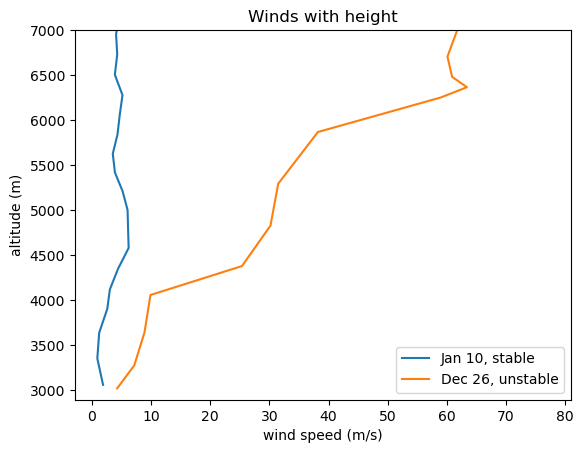

In [6]:
# Make a plot of height vs. windspeed for both days
# Zoom in near the surface
plt.figure()
plt.plot(sonde_temp_profile['wspd'],sonde_temp_profile['alt'],label='Jan 10, stable')
plt.plot(sonde_temp_profile2['wspd'],sonde_temp_profile2['alt'],label='Dec 26, unstable')
plt.ylabel('altitude (m)')
plt.xlabel('wind speed (m/s)')
plt.ylim(2890,7000) 
plt.title('Winds with height')
plt.legend(loc="best")

### How do we get the 10 m wind speed needed for the Gaussian model?
We presume that 2890 m is the true surface height where the balloon was launched.
The first measurement height is at about 3000 m, which is 110 m above the surface.
We can use the power law relationship to scale down the wind to 10 m.

We will call this location rural, and say that Jan 10 is type F. and Dec 26 is type A.
To learn more about how type A and type F are defined, see page 10 and 11 of the typed lecture notes on dispersion and smokestack plumes.

Basically, these are the Pasquill-Gifford-Turner Stability Classifications. Type A is very unstable.  Type F is stable.  These inform the choice of p value in the scaling 
calculations below.

In [9]:
# Presuming the first sonde-recorded wind speeds at ~3000 m as 110 m above the ground
# Note that this is not the 10 m that the EPA wants.  
# We use the scaling equations to estimate the 10 m value.
uref1 = 1.87
zref1 = 110
p1 = 0.55
z1 = 10
u10_1 = uref1*np.power(z1/zref1,p1)
print(u10_1)

uref2 = 4.25 
# note that I read this off the lowest measurement from the sounding
zref2 = 110
p2 = 0.07
z2 = 10
u10_2 = uref2*np.power(z2/zref2,p2)
print(u10_2)


0.5001216204828121
3.593283160069813


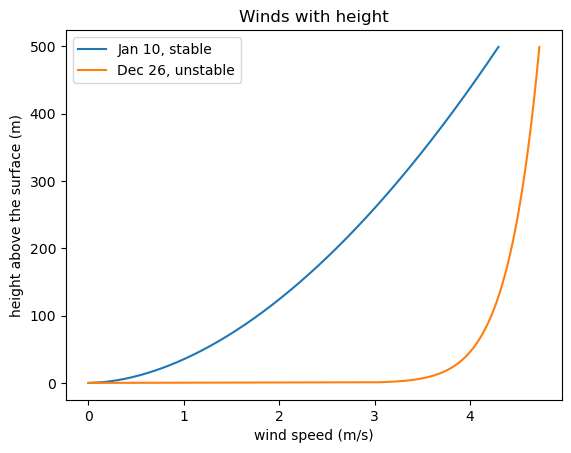

In [10]:
# and we can create plots of these vertical profiles and compare them
z =  np.arange(0,500,1)
u1 = uref1*np.power(z/zref1,p1)
u2 = uref2*np.power(z/zref2,p2)

plt.figure()
plt.plot(u1,z,label='Jan 10, stable')
plt.plot(u2,z,label='Dec 26, unstable')
plt.ylabel('height above the surface (m)')
plt.xlabel('wind speed (m/s)')
#plt.ylim(2890,7000) 
plt.title('Winds with height')
plt.legend(loc="best")

We can see that the p parameter determines the shape and how winds scale with height.  The stability is very important.